In [1]:
from transformers import AutoTokenizer

In [2]:
tokenizer=AutoTokenizer.from_pretrained("abeja/gpt2-large-japanese")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [3]:
tokenizer.tokenize("今日はいい天気ですね")

['▁', '今日', 'は', 'いい', '天気', 'です', 'ね']

In [19]:
!pip install transformers[sentencepiece]

zsh:1: no matches found: transformers[sentencepiece]


In [6]:
G = [[] for i in range(5)]

In [7]:
G

[[], [], [], [], []]

In [8]:
G[1].append((2, 2 * 1))

In [9]:
G

[[], [(2, 2)], [], [], []]

In [10]:
type((2, 2 * 1))

tuple

In [11]:
cnt = [[0] * 2 for i in range(4)]

In [12]:
cnt

[[0, 0], [0, 0], [0, 0], [0, 0]]

In [14]:
from collections import deque
dq = deque([(0, 0, -1)])


In [15]:
d, v, e = dq.popleft()

In [16]:
d,v,e

(0, 0, -1)

In [17]:
d

0

In [18]:
a = 5     # binary:  0101
b = 3     # binary:  0011
c = a ^ b # result:  0110  (which is 6)
print(c)  # 6

6


In [1]:
import numpy as np

In [23]:
K,D=(50,64)

In [47]:
pos_enc=np.zeros((D,K))
pos_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
for i in range(D):
    for j in range(K):
        if(i%2==0):
            pos_enc[i][j]=np.sin(j/(10000**(i/D)))
        else:
            pos_enc[i][j]=np.cos(j/(10000**((i-1)/D)))
# pos_enc=np.zeros((K,D))
# for i in range(K):
#     for k in range(D//2):
#         theta=i/(10000**(2*k)/D)
#         pos_enc[i][2*k]=np.sin(theta)
#         pos_enc[i][2*k+1]=np.cos(theta)

In [49]:
pos_enc

array([[ 0.00000000e+00,  8.41470985e-01,  9.09297427e-01, ...,
         1.23573123e-01, -7.68254661e-01, -9.53752653e-01],
       [ 1.00000000e+00,  5.40302306e-01, -4.16146837e-01, ...,
        -9.92335469e-01, -6.40144339e-01,  3.00592544e-01],
       [ 0.00000000e+00,  6.81561350e-01,  9.97479998e-01, ...,
        -6.34613764e-01, -9.91116276e-01, -8.15906662e-01],
       ...,
       [ 1.00000000e+00,  9.99999984e-01,  9.99999937e-01, ...,
         9.99965073e-01,  9.99963571e-01,  9.99962037e-01],
       [ 0.00000000e+00,  1.33352143e-04,  2.66704283e-04, ...,
         6.26750970e-03,  6.40085917e-03,  6.53420852e-03],
       [ 1.00000000e+00,  9.99999991e-01,  9.99999964e-01, ...,
         9.99980359e-01,  9.99979514e-01,  9.99978652e-01]])

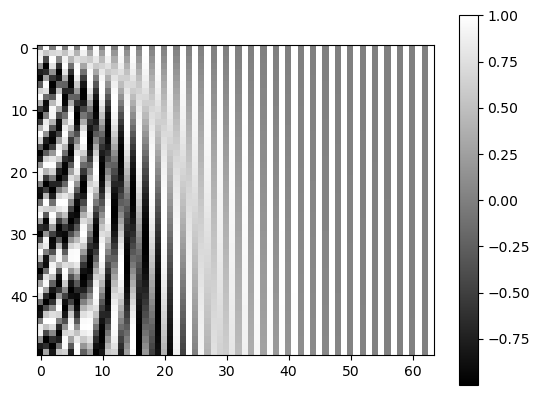

In [50]:
import matplotlib.pyplot as plt
im=plt.imshow(pos_enc.T,cmap='gray')
plt.colorbar()
plt.show()

In [51]:
naiseki=np.matmul(pos_enc.T,pos_enc)
naiseki

array([[32.        , 30.91683166, 28.303862  , ..., 14.61110829,
        14.51723443, 15.2134844 ],
       [30.91683166, 32.        , 30.91683166, ..., 15.91257648,
        14.61110829, 14.51723443],
       [28.303862  , 30.91683166, 32.        , ..., 17.81457869,
        15.91257648, 14.61110829],
       ...,
       [14.61110829, 15.91257648, 17.81457869, ..., 32.        ,
        30.91683166, 28.303862  ],
       [14.51723443, 14.61110829, 15.91257648, ..., 30.91683166,
        32.        , 30.91683166],
       [15.2134844 , 14.51723443, 14.61110829, ..., 28.303862  ,
        30.91683166, 32.        ]])

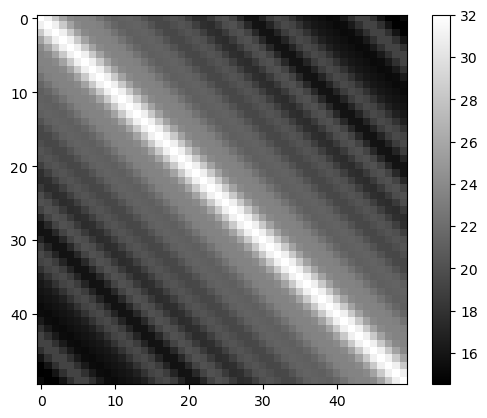

In [52]:
plt.imshow(naiseki.T,cmap='gray')
plt.colorbar()
plt.show()

In [44]:
pos_enc=np.zeros((K,D))
for i in range(K):
    for k in range(D//2):
        theta=i/(10000**((2*k)/D))
        if(i==1 and k==0):
            print(theta)
            print(np.sin(theta))
        pos_enc[i][2*k]=np.sin(theta)
        pos_enc[i][2*k+1]=np.cos(theta)

1.0
0.8414709848078965


In [45]:
pos_enc.T

array([[ 0.00000000e+00,  8.41470985e-01,  9.09297427e-01, ...,
         1.23573123e-01, -7.68254661e-01, -9.53752653e-01],
       [ 1.00000000e+00,  5.40302306e-01, -4.16146837e-01, ...,
        -9.92335469e-01, -6.40144339e-01,  3.00592544e-01],
       [ 0.00000000e+00,  6.81561350e-01,  9.97479998e-01, ...,
        -6.34613764e-01, -9.91116276e-01, -8.15906662e-01],
       ...,
       [ 1.00000000e+00,  9.99999984e-01,  9.99999937e-01, ...,
         9.99965073e-01,  9.99963571e-01,  9.99962037e-01],
       [ 0.00000000e+00,  1.33352143e-04,  2.66704283e-04, ...,
         6.26750970e-03,  6.40085917e-03,  6.53420852e-03],
       [ 1.00000000e+00,  9.99999991e-01,  9.99999964e-01, ...,
         9.99980359e-01,  9.99979514e-01,  9.99978652e-01]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])